<a href="https://colab.research.google.com/github/AndreVelasques7/inteligencia_computacional/blob/main/at-04/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

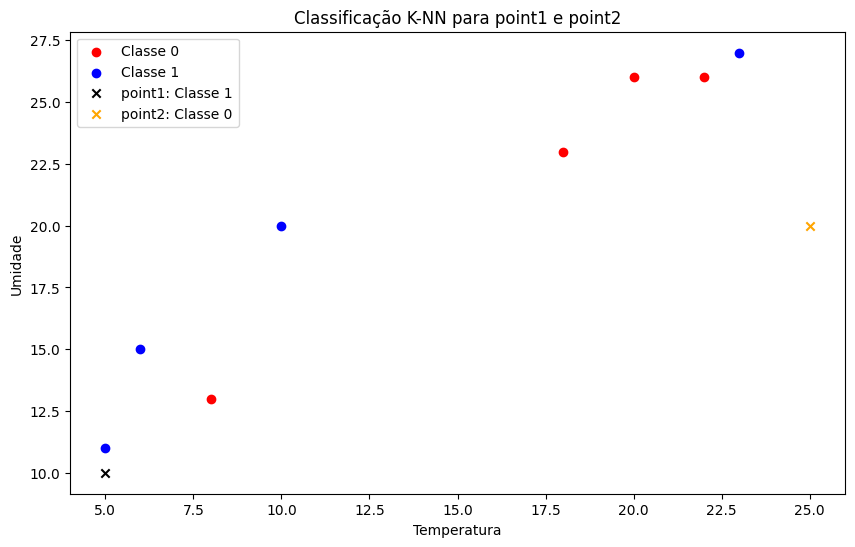

('Classe 1', 'Classe 0')

In [2]:
import math
import matplotlib.pyplot as plt

# Dados de treinamento com atributos de Temperatura, Umidade e Classe
training_data = [
    (10, 20, 'Classe 1'), (8, 13, 'Classe 0'), (6, 15, 'Classe 1'),
    (5, 11, 'Classe 1'), (20, 26, 'Classe 0'), (22, 26, 'Classe 0'),
    (23, 27, 'Classe 1'), (18, 23, 'Classe 0')
]

# Pontos a serem classificados
point1 = (5, 10)
point2 = (25, 20)

# Número de vizinhos mais próximos a considerar
neighbors_count = 3

# Calcula a distância euclidiana entre dois pontos
def euclidean_distance(point_a, point_b):
    return math.sqrt(sum((coord_a - coord_b) ** 2 for coord_a, coord_b in zip(point_a, point_b)))

# Encontra os vizinhos mais próximos de um ponto dado
def find_neighbors(point, data, k):
    distances = [(euclidean_distance(point, (temp, humidity)), flower_class) for temp, humidity, flower_class in data]
    distances.sort(key=lambda x: x[0])
    return distances[:k]

# Classifica um novo ponto com base nos vizinhos mais próximos
def classify_point(point, data, k):
    neighbors = find_neighbors(point, data, k)
    class_votes = {}
    for _, flower_class in neighbors:
        class_votes[flower_class] = class_votes.get(flower_class, 0) + 1
    return max(class_votes, key=class_votes.get)

# Classifica os pontos point1 e point2
class_point1 = classify_point(point1, training_data, neighbors_count)
class_point2 = classify_point(point2, training_data, neighbors_count)

# Separa os dados de treinamento por classe para visualização
class_0 = [(temp, humidity) for temp, humidity, flower_class in training_data if flower_class == 'Classe 0']
class_1 = [(temp, humidity) for temp, humidity, flower_class in training_data if flower_class == 'Classe 1']

# Plotando os dados de treinamento e os pontos a serem classificados
plt.figure(figsize=(10, 6))
plt.scatter(*zip(*class_0), color='red', label='Classe 0')
plt.scatter(*zip(*class_1), color='blue', label='Classe 1')
plt.scatter(*point1, color='black', marker='x', label=f'point1: {class_point1}')
plt.scatter(*point2, color='orange', marker='x', label=f'point2: {class_point2}')

plt.xlabel('Temperatura')
plt.ylabel('Umidade')
plt.legend()
plt.title('Classificação K-NN para point1 e point2')

# Mostra o gráfico
plt.show()

# Retorna as classes dos pontos point1 e point2
class_point1, class_point2
